<a href="https://colab.research.google.com/github/wulanika/Dataset_Multilabel/blob/main/Dataset_Multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [3]:
import os
os.environ["KAGGLE_USERNAME"] = "wulanika" # Ganti dengan username Kaggle Anda
os.environ["KAGGLE_KEY"] = "2452a6ca6395f7cf2802780c0a8c195d" # Ganti dengan key yang ada di kaggle.json

In [4]:
!kaggle datasets download -d wulanika/dataset-multilabel

Dataset URL: https://www.kaggle.com/datasets/wulanika/dataset-multilabel
License(s): CC-BY-SA-4.0


In [5]:
!unzip dataset-multilabel.zip

Archive:  dataset-multilabel.zip
  inflating: Tugas 3 Deep Learning/DatasetMultilabel_WulanIkaAyudiansyahWahid_202255202048/Gambar001.jpg  
  inflating: Tugas 3 Deep Learning/DatasetMultilabel_WulanIkaAyudiansyahWahid_202255202048/Gambar002.jpg  
  inflating: Tugas 3 Deep Learning/DatasetMultilabel_WulanIkaAyudiansyahWahid_202255202048/Gambar003.jpg  
  inflating: Tugas 3 Deep Learning/DatasetMultilabel_WulanIkaAyudiansyahWahid_202255202048/Gambar004.jpg  
  inflating: Tugas 3 Deep Learning/DatasetMultilabel_WulanIkaAyudiansyahWahid_202255202048/Gambar005.jpg  
  inflating: Tugas 3 Deep Learning/DatasetMultilabel_WulanIkaAyudiansyahWahid_202255202048/Gambar006.jpg  
  inflating: Tugas 3 Deep Learning/DatasetMultilabel_WulanIkaAyudiansyahWahid_202255202048/Gambar007.jpg  
  inflating: Tugas 3 Deep Learning/DatasetMultilabel_WulanIkaAyudiansyahWahid_202255202048/Gambar008.jpg  
  inflating: Tugas 3 Deep Learning/DatasetMultilabel_WulanIkaAyudiansyahWahid_202255202048/Gambar009.jpg  
  in

In [7]:
#Now let us read metadata to get our Y values (multiple lables)
df = pd.read_csv('/content/Tugas 3 Deep Learning/traindataset_WulanIkaAyudiansyahWahid_202255202048.csv')
print(df.head())     # printing first five rows of the file
print(df.columns)

df = df.iloc[:2000]  #Loading only first 1000 datapoints for memory reasons
#Need to read images using the tag from metadata.
#Otherwise, if read directly from the folder then images may not correspond to
#the metadata from the csv file.

          ID                                    Objek  Liptint  Dompet  \
0  Gambar001  ['Liptint','Dompet','Parfum','Jepitan']        1       1   
1  Gambar002  ['Liptint','Dompet','Parfum','Jepitan']        1       1   
2  Gambar003  ['Liptint','Dompet','Parfum','Jepitan']        1       1   
3  Gambar004  ['Liptint','Dompet','Parfum','Jepitan']        1       1   
4  Gambar005  ['Liptint','Dompet','Parfum','Jepitan']        1       1   

   Parfum  Jepitan  
0       1        1  
1       1        1  
2       1        1  
3       1        1  
4       1        1  
Index(['ID', 'Objek', 'Liptint', 'Dompet', 'Parfum', 'Jepitan'], dtype='object')


In [16]:
SIZE = 224
X_dataset = []
#Define image_directory before it's used in the loop
image_directory = '/content/Tugas 3 Deep Learning/DatasetMultilabel_WulanIkaAyudiansyahWahid_202255202048' # Change to extracted image directory
for i in tqdm(range(df.shape[0])):
    # Added '/' as a separator between image_directory and filename
    img = image.load_img(image_directory + '/' + df['ID'][i]+'.jpg', target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

X = np.array(X_dataset)

100%|██████████| 300/300 [00:30<00:00,  9.83it/s]


In [17]:
print(df['ID'][299])

Gambar300


In [18]:
print(df['Objek'][299])

['Dompet','Parfum']


In [19]:
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(df.drop(['ID', 'Objek'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [20]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins.

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat).

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 220, 220, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 106, 106, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 53, 53, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 49, 49, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 996,324 (3.80 MB)

 Trainable params: 995,972 (3.80 MB)

 Non-trainable params: 352 (1.38 KB)

In [21]:
#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=16)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 817ms/step - accuracy: 0.1718 - loss: 1.0538 - val_accuracy: 0.2778 - val_loss: 0.5559
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3305 - loss: 0.9448 - val_accuracy: 0.4333 - val_loss: 0.6444
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2361 - loss: 0.6880 - val_accuracy: 0.5778 - val_loss: 0.6395
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2337 - loss: 0.8044 - val_accuracy: 0.4556 - val_loss: 0.6410
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3359 - loss: 0.5989 - val_accuracy: 0.0111 - val_loss: 0.9041
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3245 - loss: 0.6071 - val_accuracy: 0.6111 - val_loss: 1.1369
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3344 - loss: 0.6394 - val_accuracy: 0.2667 - val_loss: 0.7699
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3258 - loss: 0.5223 - val_accuracy: 

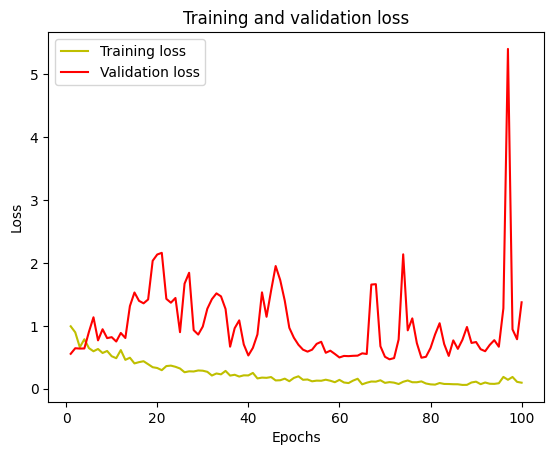

In [23]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

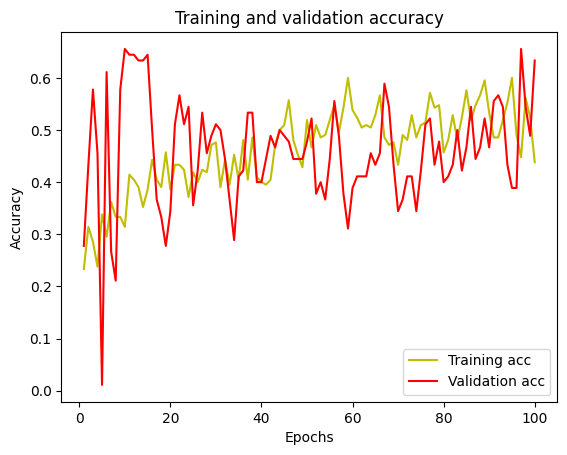

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step


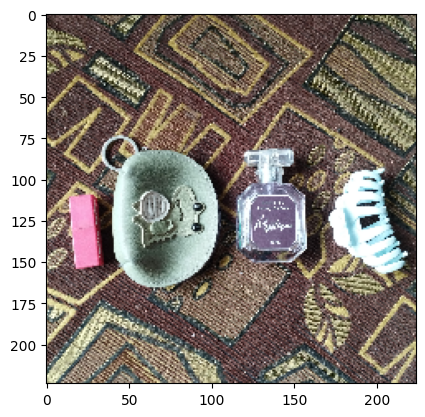

In [26]:
#Validate on an image
#img = image.load_img('/content/Multi_Label_dataset/Images/tt0085318.jpg', target_size=(SIZE,SIZE,3))
# Assuming 'ddlj.jpg' is in '/content/Multi_Label_dataset/Images/'
img = image.load_img('/content/Tugas 3 Deep Learning/DatasetMultilabel_WulanIkaAyudiansyahWahid_202255202048/Gambar001.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

In [27]:
#Print classes and corresponding probabilities
for i in range(4):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

Jepitan (1.0)
Parfum (1.0)
Dompet (1.0)
Liptint (1.0)


In [28]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 575ms/step - accuracy: 0.6135 - loss: 1.3891
Accuracy =  63.333332538604736 %


In [29]:
# prompt: berikan code evaluasi model

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (e.g., using a threshold)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming 0.5 as the threshold

# Calculate and print the classification report
print(classification_report(y_test, y_pred_classes, target_names=classes))


# Calculate and print the confusion matrix (optional)
# Note: Confusion matrices are best visualized for binary or few-class problems
# For multi-label, confusion matrix for each label is more informative
for i in range(len(classes)):
  print(f"Confusion Matrix for {classes[i]}:")
  print(confusion_matrix(y_test[:,i], y_pred_classes[:,i]))


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 743ms/step
              precision    recall  f1-score   support

     Liptint       0.69      1.00      0.82        58
      Dompet       0.80      1.00      0.89        72
      Parfum       0.81      0.96      0.88        70
     Jepitan       0.84      0.84      0.84        70

   micro avg       0.78      0.95      0.86       270
   macro avg       0.79      0.95      0.86       270
weighted avg       0.79      0.95      0.86       270
 samples avg       0.78      0.93      0.83       270

Confusion Matrix for Liptint:
[[ 6 26]
 [ 0 58]]
Confusion Matrix for Dompet:
[[ 0 18]
 [ 0 72]]
Confusion Matrix for Parfum:
[[ 4 16]
 [ 3 67]]
Confusion Matrix for Jepitan:
[[ 9 11]
 [11 59]]
